In [163]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('font', family='SimHei')

# 健保門診及住院就診人數統計(含類流感)

In [162]:
df = pd.read_csv('https://raw.githubusercontent.com/lilyku26/some-data/master/NHI_Influenza_like_illness.csv')
df['健保就診人次(不含類流感)'] = df.健保就診總人次 - df.類流感健保就診人次
df.head()

,年,週,就診類別,年齡別,縣市,類流感健保就診人次,健保就診總人次,健保就診人次(不含類流感)
0,2008,14,住院,0-4,台中市,39,182,143
1,2008,14,住院,0-4,台北市,34,267,233
2,2008,14,住院,0-4,台東縣,0,17,17
3,2008,14,住院,0-4,台南市,2,35,33
4,2008,14,住院,0-4,宜蘭縣,3,74,71


# 1.歷年住院與門診人數統計

In [68]:
df_in = df[df['就診類別']=='住院']
df_out = df[df['就診類別']=='門診']

門診人數

In [176]:
in_patient_df = pd.DataFrame(columns=['年','健保就診總人次','類流感健保就診人次'])
for i in range(0,10):
    pop_in = df_in[df_in['年'] == i+2008]
    in_patient_df.loc[i] = [i+2008, pop_in['健保就診總人次'].sum(), pop_in['類流感健保就診人次'].sum()]
in_patient_df.head()

,年,健保就診總人次,類流感健保就診人次
0,2008,1373224,40622
1,2009,1830118,93130
2,2010,1923596,109320
3,2011,1976015,129853
4,2012,1941519,122815


住院人數

In [177]:
out_patient_df = pd.DataFrame(columns=['年','健保就診總人次','類流感健保就診人次'])
for i in range(0,10):
    pop_out = df_out[df_out['年'] == i+2008]
    out_patient_df.loc[i] = [i+2008, pop_out['健保就診總人次'].sum(), pop_out['類流感健保就診人次'].sum()]
out_patient_df.head()

,年,健保就診總人次,類流感健保就診人次
0,2008,174314825,1784492
1,2009,238694443,3395014
2,2010,244366439,2822171
3,2011,251082243,3256004
4,2012,247475960,3231997


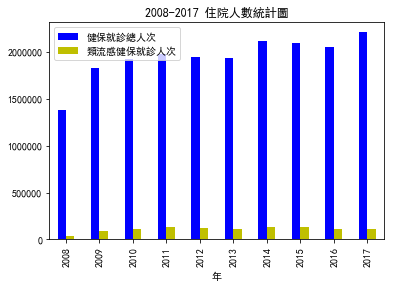

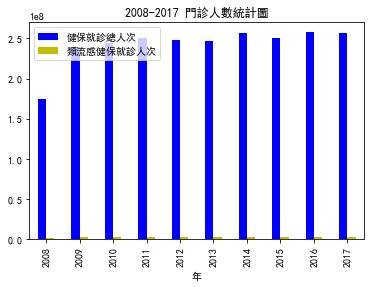

In [82]:
subplot = True 
in_patient_df.plot(x='年', y=['健保就診總人次', '類流感健保就診人次'], color=['b', 'y'], kind='bar',
                           title='2008-2017 住院人數統計圖')
out_patient_df.plot(x='年', y=['健保就診總人次', '類流感健保就診人次'], color=['b', 'y'], kind='bar',
                           title='2008-2017 門診人數統計圖')

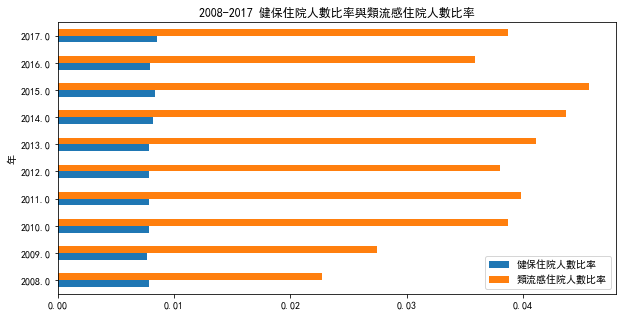

In [188]:
patient_df = pd.DataFrame(columns=['年','健保住院人數比率','類流感住院人數比率'])
for i in range(0,10):
    pop_in = df_in[df_in['年'] == i+2008]  #住院人數
    pop_out = df_out[df_out['年'] == i+2008]   #門診人數
    patient_df.loc[i] = [i+2008,(pop_in['健保就診總人次'].sum())/(pop_out['健保就診總人次'].sum()) , 
                          (pop_in['類流感健保就診人次'].sum())/(pop_out['類流感健保就診人次'].sum())]
patient_df.plot(x='年' , y= ['健保住院人數比率','類流感住院人數比率'], kind= 'barh',
               title='2008-2017 健保住院人數比率與類流感住院人數比率', figsize=(10,5))

# 2.歷年不同年齡層住院與門診人數

In [83]:
age=['0-4', '5-14', '15-24', '25-64', '65+']

各年齡層，歷年健保"門診"就診人數比例&歷年類流感健保"門診"就診人數比例

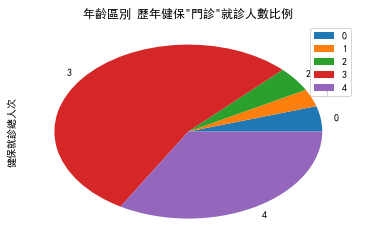

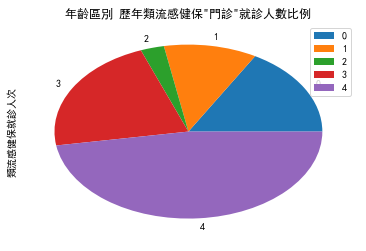

In [164]:
age_inpatient_df = pd.DataFrame(columns=['年紀','健保就診總人次','類流感健保就診人次'])
for i in range(0,5):
    pop_in = df_in[df_in['年齡別'] == age[i]]
    age_inpatient_df.loc[i] = [age[i], pop_in['健保就診總人次'].sum(), pop_in['類流感健保就診人次'].sum()]
subplot=True
age_inpatient_df.plot(x='年紀', y='健保就診總人次',  kind='pie',
                           title='年齡區別 歷年健保"門診"就診人數比例')
age_inpatient_df.plot(x='年紀', y='類流感健保就診人次',  kind='pie',
                           title='年齡區別 歷年類流感健保"門診"就診人數比例')

以健保門診比例來說，25-64區間的人數最多

但以類流感門診來說，65+區間的人數最多

-

健保住院人數&類流感住院人數

In [189]:
age_outpatient_df = pd.DataFrame(columns=['年紀','健保就診總人次','類流感健保就診人次'])
for i in range(0,5):
    pop_out = df_out[df_out['年齡別'] == age[i]]
    age_outpatient_df.loc[i] = [age[i], pop_out['健保就診總人次'].sum(), pop_out['類流感健保就診人次'].sum()]

-

各年齡層 住院人數統計圖 & 門診人數統計圖

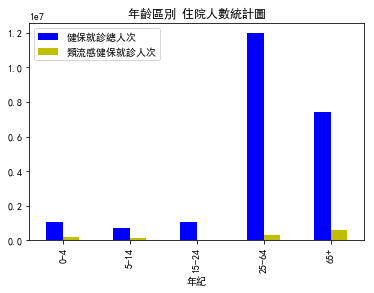

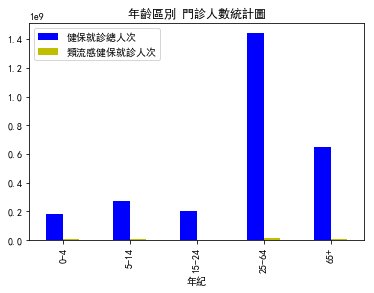

In [155]:
subplot = True 
age_inpatient_df.plot(x='年紀', y=['健保就診總人次', '類流感健保就診人次'], color=['b', 'y'], kind='bar',
                           title='年齡區別 住院人數統計圖')
age_outpatient_df.plot(x='年紀', y=['健保就診總人次', '類流感健保就診人次'], color=['b', 'y'], kind='bar',
                           title='年齡區別 門診人數統計圖')

# 3.不同年齡層類流感患者與其他患者的住院機率

類流感患者(健保)住院機率

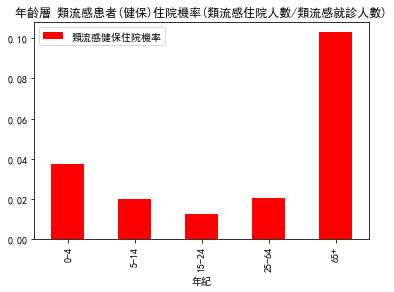

In [146]:
probability_cold_df = pd.DataFrame(columns=['年紀','類流感健保住院機率'])
for i in range(0,5):
    pop = df[df['年齡別'] == age[i]]
    pop_in = pop[pop['就診類別']=='住院']
    pop_out = pop[pop['就診類別']=='門診']
    probability_cold_df.loc[i] = [age[i], pop_in['類流感健保就診人次'].sum()/(pop['類流感健保就診人次'].sum() )]

probability_cold_df.plot(x='年紀', y=['類流感健保住院機率'],  color='r', kind='bar',
                           title='年齡層 類流感患者(健保)住院機率(類流感住院人數/類流感就診人數)')

健保患者住院機率(不含類流感)

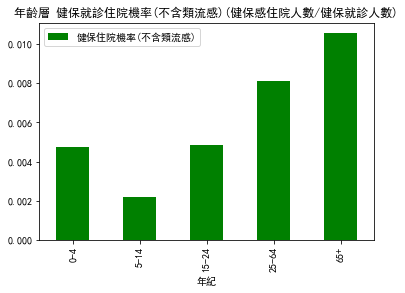

In [147]:
probability_hos_df = pd.DataFrame(columns=['年紀','健保住院機率(不含類流感)'])
for i in range(0,5):
    pop = df[df['年齡別'] == age[i]]
    pop_in = pop[pop['就診類別']=='住院']
    pop_out = pop[pop['就診類別']=='門診']
    probability_hos_df.loc[i] = [age[i], pop_in['健保就診人次(不含類流感)'].sum()/(pop['健保就診人次(不含類流感)'].sum() )]
probability_hos_df
probability_hos_df.plot(x='年紀', y=['健保住院機率(不含類流感)'], color='g', kind='bar',
                           title='年齡層 健保就診住院機率(不含類流感)(健保感住院人數/健保就診人數)')

不論是類流感或無類流感，年齡別在65+ 的比例最高 

其中類流感住院比例第二高的年齡層為：0-4

至於非類流感住院比例，因為25-64的區間太大，所以無法明辨

# 4.台灣各縣市歷年類流感人數

In [118]:
city = ['基隆市','台北市','新北市','桃園市','新竹市','新竹縣','苗栗縣','台中市',
       '彰化縣','南投縣','雲林縣','嘉義市','嘉義縣','台南市','高雄市','屏東縣',
        '台東縣','花蓮縣','宜蘭縣','澎湖縣','金門縣','連江縣'] #22

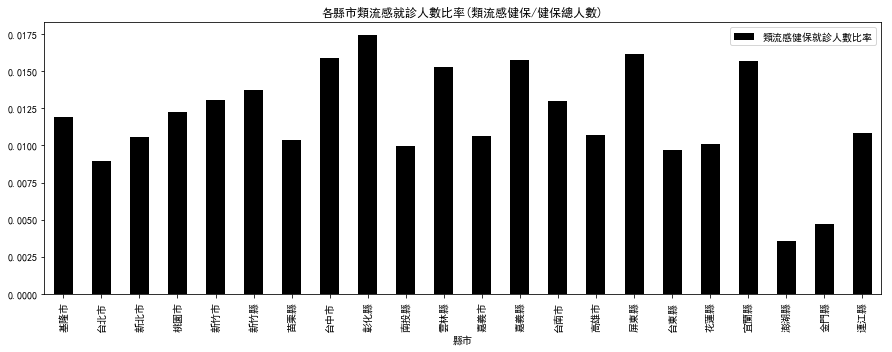

In [182]:
city_cold_df = pd.DataFrame(columns=['縣市','類流感健保就診人數比率'])
for i in range(0,22):
    city_df = df[df['縣市']== city[i]]
    city_cold_df.loc[i]=[city[i], city_df['類流感健保就診人次'].sum()/city_df['健保就診總人次'].sum()]
city_cold_df.plot(x='縣市' , y= '類流感健保就診人數比率', color ='k', kind='bar' ,
                  title='各縣市類流感就診人數比率(類流感健保/健保總人數)', figsize=(15,5))

歷年類流感就診比例最少的縣市為：澎湖縣 ；最高為；彰化縣

# 5. 2017年台北市每週類流感就診人數比率

In [172]:
df1=df[(df['年']==2017) & (df['縣市']=='台北市')]
df1.head()

,年,週,就診類別,年齡別,縣市,類流感健保就診人次,健保就診總人次,健保就診人次(不含類流感)
98919,2017,1,住院,0-4,台北市,27,270,243
98939,2017,1,住院,15-24,台北市,4,274,270
98959,2017,1,住院,25-64,台北市,73,4641,4568
98981,2017,1,住院,5-14,台北市,21,206,185
99002,2017,1,住院,65+,台北市,178,3394,3216


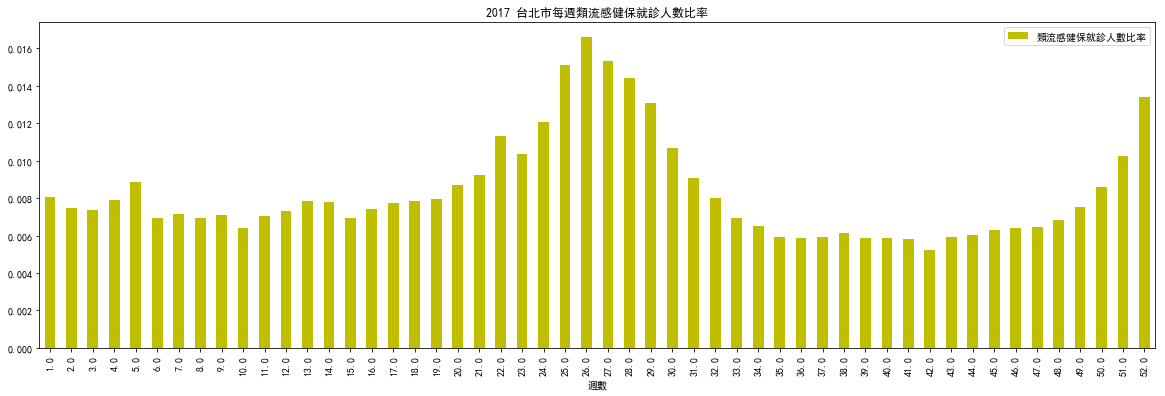

In [184]:
Taipei_2017_pob_df= pd.DataFrame(columns=['週數','類流感健保就診人數比率'])
for i in range (0,52):
    df1_week =df1[df1['週']== i+1]
    Taipei_2017_pob_df.loc[i]=[i+1 , df1_week['類流感健保就診人次'].sum() / df1_week['健保就診總人次'].sum()]
Taipei_2017_pob_df.plot(x= '週數', y ='類流感健保就診人數比率', color='y' , kind='bar',
                       title='2017 台北市每週類流感健保就診人數比率', figsize=(20,6))

感覺2017年暑假與接近12月時，台北市的類流感患者的就診人數比率比較高

因此暑假與冬天要多注意身體